# Working with personal data requests


In [265]:
import pandas as pd
import numpy as np
import json

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



## Part 1

In [404]:
#here I am uploading my spotify data-set; the data file is in Json.
spotify = pd.read_json("StreamingHistory0.json") 

In [267]:
#After uploading and reading the data, now I wana see what type of data it is and how many entries are there in the data. 
print(type(spotify))
print(len(spotify))

<class 'pandas.core.frame.DataFrame'>
8185


In [268]:
#after that, I went to 
spotify["endTime"]

0       2022-09-01 17:31
1       2022-09-01 17:31
2       2022-09-01 17:32
3       2022-09-01 17:32
4       2022-09-01 17:36
              ...       
8180    2023-04-01 19:36
8181    2023-04-01 19:42
8182    2023-04-01 19:47
8183    2023-04-01 19:51
8184    2023-04-01 19:55
Name: endTime, Length: 8185, dtype: object

In [269]:
# At the end, make sure you export your dataframe (containing timestamps) using .to_csv
spotify["endTime"].to_csv("endTimes.csv", date_format='%d%m%Y')

In [270]:
endtimes = pd.read_csv("mydata.csv")

In [271]:
endtimes

Unnamed: 0           endTime
0              0  2022-09-01 17:31
1              1  2022-09-01 17:31
2              2  2022-09-01 17:32
3              3  2022-09-01 17:32
4              4  2022-09-01 17:36
...          ...               ...
8180        8180  2023-04-01 19:36
8181        8181  2023-04-01 19:42
8182        8182  2023-04-01 19:47
8183        8183  2023-04-01 19:51
8184        8184  2023-04-01 19:55

[8185 rows x 2 columns]

In [273]:
endtimes['endTime'] = pd.to_datetime(endtimes['endTime'],dayfirst=False, yearfirst=False, utc=False, format=None, cache=True)

In [274]:
endtimes.sort_values(by='endTime', inplace=True)
endtimes

Unnamed: 0             endTime
0              0 2022-09-01 17:31:00
1              1 2022-09-01 17:31:00
2              2 2022-09-01 17:32:00
3              3 2022-09-01 17:32:00
4              4 2022-09-01 17:36:00
...          ...                 ...
8180        8180 2023-04-01 19:36:00
8181        8181 2023-04-01 19:42:00
8182        8182 2023-04-01 19:47:00
8183        8183 2023-04-01 19:51:00
8184        8184 2023-04-01 19:55:00

[8185 rows x 2 columns]

In [275]:
# creating a new column that countains the difference between timestamps
endtimes["New endTime"] = endtimes['endTime'].diff(periods=1)

In [276]:
#sort the values in a chronological order using the values in the new column.
endtimes.sort_values(by= "New endTime")

Unnamed: 0             endTime     New endTime
1              1 2022-09-01 17:31:00 0 days 00:00:00
6484        6484 2023-02-18 00:39:00 0 days 00:00:00
6483        6483 2023-02-18 00:39:00 0 days 00:00:00
6482        6482 2023-02-18 00:39:00 0 days 00:00:00
2663        2663 2022-11-11 18:50:00 0 days 00:00:00
...          ...                 ...             ...
8055        8055 2023-03-24 23:45:00 2 days 01:23:00
8071        8071 2023-03-27 19:00:00 2 days 12:54:00
7635        7635 2023-03-11 20:22:00 2 days 16:12:00
4175        4175 2022-12-31 17:21:00 4 days 14:23:00
0              0 2022-09-01 17:31:00             NaT

[8185 rows x 3 columns]

In [272]:
# these steps will be helpful in part three.

In [277]:


endtimes['Day'] = endtimes["endTime"].dt.day

endtimes['day_mode'] = endtimes['Day'].map(endtimes['Day'].value_counts())

endtimes['Date'] = endtimes["endTime"].dt.date

endtimes['date_mode'] = endtimes['Date'].map(endtimes['Date'].value_counts())

#### I have created this after working with Henok's data. I created the same columns names for both data so that I can easily using with I am doing the visualization. 

In [278]:
endtimes['Month'] = endtimes["endTime"].dt.month

endtimes['Month_mode'] = endtimes['Month'].map(endtimes['Month'].value_counts())

In [279]:
endtimes

Unnamed: 0             endTime     New endTime  Day  day_mode  \
0              0 2022-09-01 17:31:00             NaT    1       266   
1              1 2022-09-01 17:31:00 0 days 00:00:00    1       266   
2              2 2022-09-01 17:32:00 0 days 00:01:00    1       266   
3              3 2022-09-01 17:32:00 0 days 00:00:00    1       266   
4              4 2022-09-01 17:36:00 0 days 00:04:00    1       266   
...          ...                 ...             ...  ...       ...   
8180        8180 2023-04-01 19:36:00 0 days 00:06:00    1       266   
8181        8181 2023-04-01 19:42:00 0 days 00:06:00    1       266   
8182        8182 2023-04-01 19:47:00 0 days 00:05:00    1       266   
8183        8183 2023-04-01 19:51:00 0 days 00:04:00    1       266   
8184        8184 2023-04-01 19:55:00 0 days 00:04:00    1       266   

            Date  date_mode  Month  Month_mode  
0     2022-09-01         29      9         697  
1     2022-09-01         29      9         697  
2     2022-09-01         29      9         697  
3     2022-09-01         29      9         697  
4     2022-09-01         29      9         697  
...          ...        ...    ...         ...  
8180  2023-04-01         19      4          19  
8181  2023-04-01         19      4          19  
8182  2023-04-01         19      4          19  
8183  2023-04-01         19      4          19  
8184  2023-04-01         19      4          19  

[8185 rows x 9 columns]

## Part 2

In [280]:
henok = pd.read_csv("Date_Henok.csv")


In [281]:
henok

Unnamed: 0               Order Date
0            0  03/14/2023 18:32:42 UTC
1            1  03/12/2023 06:00:56 UTC
2            2  03/01/2023 20:15:57 UTC
3            3  02/20/2023 17:15:58 UTC
4            4  02/16/2023 17:07:30 UTC
5            5  02/05/2023 21:43:01 UTC
6            6  01/15/2023 19:27:57 UTC
7            7  01/11/2023 07:12:55 UTC
8            8  01/11/2023 07:09:44 UTC
9            9  01/10/2023 03:47:45 UTC
10          10  12/15/2022 00:22:47 UTC
11          11  12/12/2022 16:57:02 UTC
12          12  12/10/2022 02:11:54 UTC
13          13  12/08/2022 17:50:23 UTC
14          14  11/30/2022 05:07:06 UTC
15          15  11/29/2022 02:51:26 UTC
16          16  11/24/2022 04:13:33 UTC
17          17  11/21/2022 16:26:24 UTC
18          18  09/27/2022 18:24:44 UTC
19          19  09/27/2022 18:05:18 UTC

In [282]:
henok['Order Date'] = pd.to_datetime(henok['Order Date'],dayfirst=False, yearfirst=False, utc=False, format=None, cache=True)


In [283]:
henok

Unnamed: 0                Order Date
0            0 2023-03-14 18:32:42+00:00
1            1 2023-03-12 06:00:56+00:00
2            2 2023-03-01 20:15:57+00:00
3            3 2023-02-20 17:15:58+00:00
4            4 2023-02-16 17:07:30+00:00
5            5 2023-02-05 21:43:01+00:00
6            6 2023-01-15 19:27:57+00:00
7            7 2023-01-11 07:12:55+00:00
8            8 2023-01-11 07:09:44+00:00
9            9 2023-01-10 03:47:45+00:00
10          10 2022-12-15 00:22:47+00:00
11          11 2022-12-12 16:57:02+00:00
12          12 2022-12-10 02:11:54+00:00
13          13 2022-12-08 17:50:23+00:00
14          14 2022-11-30 05:07:06+00:00
15          15 2022-11-29 02:51:26+00:00
16          16 2022-11-24 04:13:33+00:00
17          17 2022-11-21 16:26:24+00:00
18          18 2022-09-27 18:24:44+00:00
19          19 2022-09-27 18:05:18+00:00

In [285]:
henok.sort_values(by='Order Date', inplace=True)

In [286]:
henok

Unnamed: 0                Order Date
19          19 2022-09-27 18:05:18+00:00
18          18 2022-09-27 18:24:44+00:00
17          17 2022-11-21 16:26:24+00:00
16          16 2022-11-24 04:13:33+00:00
15          15 2022-11-29 02:51:26+00:00
14          14 2022-11-30 05:07:06+00:00
13          13 2022-12-08 17:50:23+00:00
12          12 2022-12-10 02:11:54+00:00
11          11 2022-12-12 16:57:02+00:00
10          10 2022-12-15 00:22:47+00:00
9            9 2023-01-10 03:47:45+00:00
8            8 2023-01-11 07:09:44+00:00
7            7 2023-01-11 07:12:55+00:00
6            6 2023-01-15 19:27:57+00:00
5            5 2023-02-05 21:43:01+00:00
4            4 2023-02-16 17:07:30+00:00
3            3 2023-02-20 17:15:58+00:00
2            2 2023-03-01 20:15:57+00:00
1            1 2023-03-12 06:00:56+00:00
0            0 2023-03-14 18:32:42+00:00

In [287]:
henok["New Date Order"] = henok['Order Date'].diff(periods=1)

In [288]:
henok

Unnamed: 0                Order Date   New Date Order
19          19 2022-09-27 18:05:18+00:00              NaT
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46

In [289]:
henok.sort_values(by= "New Date Order")

Unnamed: 0                Order Date   New Date Order
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40
19          19 2022-09-27 18:05:18+00:00              NaT

In [290]:
henok['New Date Order'].max()

Timedelta('54 days 22:01:40')

### using the max(), the longest time between Henok's data is  54 days, 22 hours, 1 minute and 40 seconds.

In [291]:
henok['New Date Order'].mean()

Timedelta('8 days 20:14:04.421052631')

### using the mean(), the average time difference between Henok's timestamps is 8 days, 20 hours, 14 minutes and 4 seconds.

In [292]:
henok['Day'] = henok["Order Date"].dt.day

henok['day_mode'] = henok['Day'].map(henok['Day'].value_counts())

henok['Date'] = henok["Order Date"].dt.date

henok['date_mode'] = henok['Date'].map(henok['Date'].value_counts())

In [293]:
henok

Unnamed: 0                Order Date   New Date Order  Day  day_mode  \
19          19 2022-09-27 18:05:18+00:00              NaT   27         2   
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26   27         2   
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40   21         1   
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09   24         1   
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53   29         1   
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40   30         1   
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17    8         1   
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31   10         2   
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08   12         2   
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45   15         2   
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58   10         2   
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59   11         2   
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11   11         2   
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02   15         2   
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04    5         1   
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29   16         1   
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28   20         1   
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59    1         1   
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59   12         2   
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46   14         1   

          Date  date_mode  
19  2022-09-27          2  
18  2022-09-27          2  
17  2022-11-21          1  
16  2022-11-24          1  
15  2022-11-29          1  
14  2022-11-30          1  
13  2022-12-08          1  
12  2022-12-10          1  
11  2022-12-12          1  
10  2022-12-15          1  
9   2023-01-10          1  
8   2023-01-11          2  
7   2023-01-11          2  
6   2023-01-15          1  
5   2023-02-05          1  
4   2023-02-16          1  
3   2023-02-20          1  
2   2023-03-01          1  
1   2023-03-12          1  
0   2023-03-14          1

In [294]:
henok['Month'] = henok["Order Date"].dt.month

henok['Month_mode'] = henok['Month'].map(henok['Month'].value_counts())

In [295]:
henok

Unnamed: 0                Order Date   New Date Order  Day  day_mode  \
19          19 2022-09-27 18:05:18+00:00              NaT   27         2   
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26   27         2   
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40   21         1   
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09   24         1   
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53   29         1   
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40   30         1   
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17    8         1   
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31   10         2   
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08   12         2   
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45   15         2   
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58   10         2   
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59   11         2   
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11   11         2   
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02   15         2   
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04    5         1   
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29   16         1   
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28   20         1   
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59    1         1   
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59   12         2   
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46   14         1   

          Date  date_mode  Month  Month_mode  
19  2022-09-27          2      9           2  
18  2022-09-27          2      9           2  
17  2022-11-21          1     11           4  
16  2022-11-24          1     11           4  
15  2022-11-29          1     11           4  
14  2022-11-30          1     11           4  
13  2022-12-08          1     12           4  
12  2022-12-10          1     12           4  
11  2022-12-12          1     12           4  
10  2022-12-15          1     12           4  
9   2023-01-10          1      1           4  
8   2023-01-11          2      1           4  
7   2023-01-11          2      1           4  
6   2023-01-15          1      1           4  
5   2023-02-05          1      2           3  
4   2023-02-16          1      2           3  
3   2023-02-20          1      2           3  
2   2023-03-01          1      3           3  
1   2023-03-12          1      3           3  
0   2023-03-14          1      3           3

In [399]:
month_value = henok["Date"].mode()

In [400]:
month_value

0    2022-09-27
1    2023-01-11
Name: Date, dtype: object

### 4. The days with the most enteries is September 27, 2022. Henok has purchased 2 products from Amazon. There was also January 11, 2023 where he purchased the same number of products from Amazon but I used the first result to answer the question.

#### In the next view lines, I just trying to setup a dataframe that I can use for visualization because when I tried to do the visualization with the "henok" data frame, I only get access to the first two columns (Unnamed and Order Date) and I loose all the other columns.

In [300]:
henok_updated['DDate'] = pd.to_datetime(henok['Date'])

In [301]:
henok_updated

Unnamed: 0                Order Date   New Date Order  Day  day_mode  \
19          19 2022-09-27 18:05:18+00:00              NaT   27         2   
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26   27         2   
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40   21         1   
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09   24         1   
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53   29         1   
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40   30         1   
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17    8         1   
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31   10         2   
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08   12         2   
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45   15         2   
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58   10         2   
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59   11         2   
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11   11         2   
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02   15         2   
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04    5         1   
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29   16         1   
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28   20         1   
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59    1         1   
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59   12         2   
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46   14         1   

          Date  date_mode  Month  Month_mode      DDate  
19  2022-09-27          2      9           2 2022-09-27  
18  2022-09-27          2      9           2 2022-09-27  
17  2022-11-21          1     11           4 2022-11-21  
16  2022-11-24          1     11           4 2022-11-24  
15  2022-11-29          1     11           4 2022-11-29  
14  2022-11-30          1     11           4 2022-11-30  
13  2022-12-08          1     12           4 2022-12-08  
12  2022-12-10          1     12           4 2022-12-10  
11  2022-12-12          1     12           4 2022-12-12  
10  2022-12-15          1     12           4 2022-12-15  
9   2023-01-10          1      1           4 2023-01-10  
8   2023-01-11          2      1           4 2023-01-11  
7   2023-01-11          2      1           4 2023-01-11  
6   2023-01-15          1      1           4 2023-01-15  
5   2023-02-05          1      2           3 2023-02-05  
4   2023-02-16          1      2           3 2023-02-16  
3   2023-02-20          1      2           3 2023-02-20  
2   2023-03-01          1      3           3 2023-03-01  
1   2023-03-12          1      3           3 2023-03-12  
0   2023-03-14          1      3           3 2023-03-14

In [302]:
henok_updated

Unnamed: 0                Order Date   New Date Order  Day  day_mode  \
19          19 2022-09-27 18:05:18+00:00              NaT   27         2   
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26   27         2   
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40   21         1   
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09   24         1   
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53   29         1   
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40   30         1   
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17    8         1   
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31   10         2   
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08   12         2   
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45   15         2   
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58   10         2   
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59   11         2   
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11   11         2   
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02   15         2   
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04    5         1   
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29   16         1   
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28   20         1   
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59    1         1   
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59   12         2   
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46   14         1   

          Date  date_mode  Month  Month_mode      DDate  
19  2022-09-27          2      9           2 2022-09-27  
18  2022-09-27          2      9           2 2022-09-27  
17  2022-11-21          1     11           4 2022-11-21  
16  2022-11-24          1     11           4 2022-11-24  
15  2022-11-29          1     11           4 2022-11-29  
14  2022-11-30          1     11           4 2022-11-30  
13  2022-12-08          1     12           4 2022-12-08  
12  2022-12-10          1     12           4 2022-12-10  
11  2022-12-12          1     12           4 2022-12-12  
10  2022-12-15          1     12           4 2022-12-15  
9   2023-01-10          1      1           4 2023-01-10  
8   2023-01-11          2      1           4 2023-01-11  
7   2023-01-11          2      1           4 2023-01-11  
6   2023-01-15          1      1           4 2023-01-15  
5   2023-02-05          1      2           3 2023-02-05  
4   2023-02-16          1      2           3 2023-02-16  
3   2023-02-20          1      2           3 2023-02-20  
2   2023-03-01          1      3           3 2023-03-01  
1   2023-03-12          1      3           3 2023-03-12  
0   2023-03-14          1      3           3 2023-03-14

In [303]:
henok_updated['month_year'] = henok_updated['DDate'].dt.strftime('%Y-%m')


#### Here I have created a new column called Month_year for only the months and the year without the date so that I can easily analyze the values.

In [304]:
henok_updated

Unnamed: 0                Order Date   New Date Order  Day  day_mode  \
19          19 2022-09-27 18:05:18+00:00              NaT   27         2   
18          18 2022-09-27 18:24:44+00:00  0 days 00:19:26   27         2   
17          17 2022-11-21 16:26:24+00:00 54 days 22:01:40   21         1   
16          16 2022-11-24 04:13:33+00:00  2 days 11:47:09   24         1   
15          15 2022-11-29 02:51:26+00:00  4 days 22:37:53   29         1   
14          14 2022-11-30 05:07:06+00:00  1 days 02:15:40   30         1   
13          13 2022-12-08 17:50:23+00:00  8 days 12:43:17    8         1   
12          12 2022-12-10 02:11:54+00:00  1 days 08:21:31   10         2   
11          11 2022-12-12 16:57:02+00:00  2 days 14:45:08   12         2   
10          10 2022-12-15 00:22:47+00:00  2 days 07:25:45   15         2   
9            9 2023-01-10 03:47:45+00:00 26 days 03:24:58   10         2   
8            8 2023-01-11 07:09:44+00:00  1 days 03:21:59   11         2   
7            7 2023-01-11 07:12:55+00:00  0 days 00:03:11   11         2   
6            6 2023-01-15 19:27:57+00:00  4 days 12:15:02   15         2   
5            5 2023-02-05 21:43:01+00:00 21 days 02:15:04    5         1   
4            4 2023-02-16 17:07:30+00:00 10 days 19:24:29   16         1   
3            3 2023-02-20 17:15:58+00:00  4 days 00:08:28   20         1   
2            2 2023-03-01 20:15:57+00:00  9 days 02:59:59    1         1   
1            1 2023-03-12 06:00:56+00:00 10 days 09:44:59   12         2   
0            0 2023-03-14 18:32:42+00:00  2 days 12:31:46   14         1   

          Date  date_mode  Month  Month_mode      DDate month_year  
19  2022-09-27          2      9           2 2022-09-27    2022-09  
18  2022-09-27          2      9           2 2022-09-27    2022-09  
17  2022-11-21          1     11           4 2022-11-21    2022-11  
16  2022-11-24          1     11           4 2022-11-24    2022-11  
15  2022-11-29          1     11           4 2022-11-29    2022-11  
14  2022-11-30          1     11           4 2022-11-30    2022-11  
13  2022-12-08          1     12           4 2022-12-08    2022-12  
12  2022-12-10          1     12           4 2022-12-10    2022-12  
11  2022-12-12          1     12           4 2022-12-12    2022-12  
10  2022-12-15          1     12           4 2022-12-15    2022-12  
9   2023-01-10          1      1           4 2023-01-10    2023-01  
8   2023-01-11          2      1           4 2023-01-11    2023-01  
7   2023-01-11          2      1           4 2023-01-11    2023-01  
6   2023-01-15          1      1           4 2023-01-15    2023-01  
5   2023-02-05          1      2           3 2023-02-05    2023-02  
4   2023-02-16          1      2           3 2023-02-16    2023-02  
3   2023-02-20          1      2           3 2023-02-20    2023-02  
2   2023-03-01          1      3           3 2023-03-01    2023-03  
1   2023-03-12          1      3           3 2023-03-12    2023-03  
0   2023-03-14          1      3           3 2023-03-14    2023-03

In [398]:
henok_updated["month_year"].mode()[0]

'2022-11'

### 5. The month with the most timestamps is November, 2022. Although there were two other months (Dec and Jan) I picked the first one to answer the questoin.

### 6. I guess the data is social media posts given the time difference between each entry. This is the first thing that came to my mind.

### 7. The Analysis of my partner seems correct and he has guess the correct data type. The conclusion made by my partner were not what I expected or how I viewed my relationship with spotify my it was very interesting.

### 8. I learned from my data that I am a music addict. I usually listen to music when I going between places, doing physical work or exercising. There was a day in which I listened over 200 songs, I dont remember what was happening but looking back to my calender, I had a long shift in which I was interecting with no one, so perhabs that why. However, seeing the number, its a lot of music!!

### Part 3

In [307]:
# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sb

### Charts 1 & 2: Below there are two bar graphs for the two datas. Due to the numerous data entries in my data (endTimes) it is very hard to create a bar chart for it, even when I selected a sample of 500 data entries. However, with Henok's data it was easy to create a bar chart due to its simple data points.

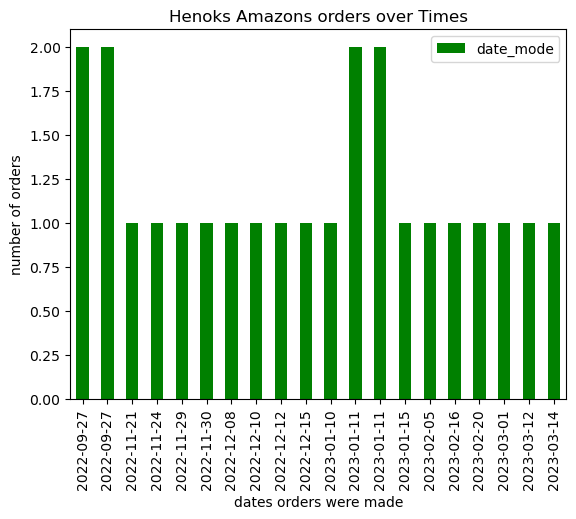

In [396]:
# i tried to use seaborn here but it did not work. All the x-axis labels were not visible or readable.
henok_updated.plot(x='Date', y= 'date_mode', kind='bar', color = "green")



# add a title and axis labels
plt.title('Henoks Amazons orders over Times')
plt.xlabel('dates orders were made')
plt.ylabel('number of orders')

# show the chart
plt.show()

In [381]:
some = endtimes.sample(n=500)
some.plot(x='Date', y= 'date_mode', kind='bar', color = "green")



# add a title and axis labels
plt.title("Hamze's Spotify Plays")
plt.xlabel('Dates')
plt.ylabel('Number of plays in that date period')
plt.xticks(rotation= 65)
# show the chart
plt.show()

## Charts 2 &3: Here I have used seaborn to plot a bar and line charts. I have one graph of each of Henok's data and the one after it is Henok's

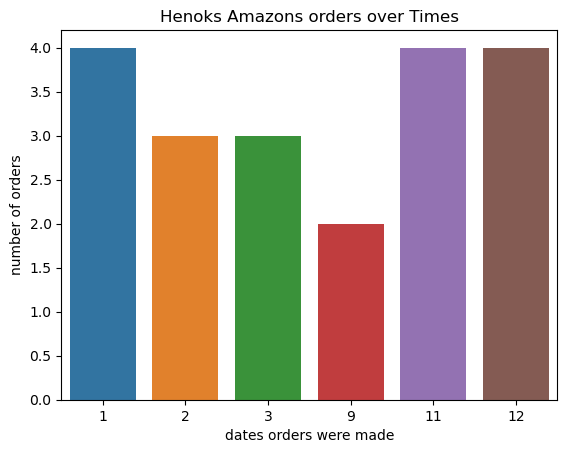

In [376]:
sb.barplot(x='Month', y='Month_mode', data=henok_updated)


# add a title and axis labels
plt.title('Henoks Amazons orders over Times')
plt.xlabel('dates orders were made')
plt.ylabel('number of orders')




# show the chart
plt.show()

### Looking at Henok's Amazon's orders, it seems it started on september and kept increasing until february. September was when he get to the College as a freshman and also it was when he got his first paycheck.

In [382]:
sb.barplot(x='Month', y='Month_mode', data=endtimes)


# add a title and axis labels
plt.title("Hamze's Spotify Plays")
plt.xlabel('Months')
plt.ylabel('number of Musics played')

plt.xticks(rotation= 65)


# show the chart
plt.show()

### Here is a chart of my music consumption in the past year, starting from september as well. February was the month where listened to most music and also felt the lowest. However, I started cutting down my music appetite. Instead of music, I replaced it with youtube lectures and interviews, thanks to Youtubes new feature of allowing users to listen to the audio of a video in the background. 






## Charts 4 & 5:  I have to line graphs of the two data's

<AxesSubplot:xlabel='Month', ylabel='Month_mode'>

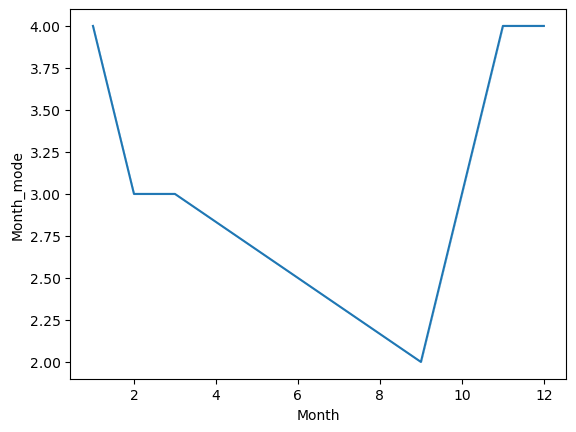

In [363]:
sb.lineplot(x='Month', y='Month_mode', data=henok_updated)

### According to this line chart, Henok had his lowest purchases in september, and the most purchases in Nov, Dec, and Jan.

<AxesSubplot:xlabel='Month', ylabel='Month_mode'>

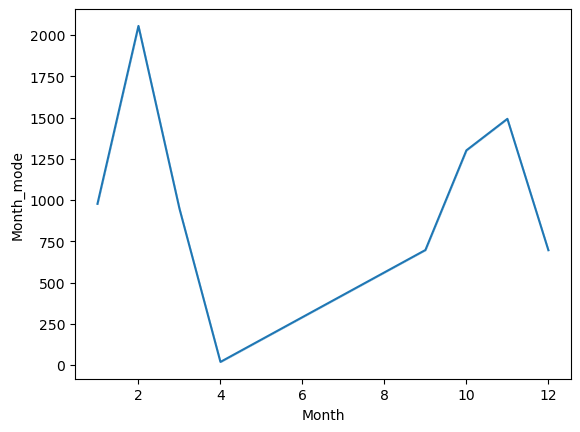

In [373]:
sb.lineplot(x='Month', y='Month_mode', data=endtimes)

### between the months of Jan and Feb my music consumption has been increasing and drop pretty drastically in the following two months. 

### One thing to note is that the line chart is using the months chronologically so the after April, the data from May last year is continued

## Part 4

In [ ]:
what was the most listed song
what was the most listened artist
what was the most listened genre


In [412]:
import json
import pandas as pd
import numpy as np

history = pd.read_json("StreamingHistory0.json")

In [413]:
history

endTime         artistName                      trackName  \
0     2022-09-01 17:31             NEFFEX                        Destiny   
1     2022-09-01 17:31             NEFFEX                        Destiny   
2     2022-09-01 17:32      Saalax Sanaag                Nolol Taba Gali   
3     2022-09-01 17:32      Saalax Sanaag                Nolol Taba Gali   
4     2022-09-01 17:36      Saalax Sanaag                Nolol Taba Gali   
...                ...                ...                            ...   
8180  2023-04-01 19:36            Nasheed                    Ana Maradun   
8181  2023-04-01 19:42           El Azhar                      El Djihad   
8182  2023-04-01 19:47  Muhammad Al Muqit              Soldiers of Allah   
8183  2023-04-01 19:51           El Azhar   Labbayk Allah Hummah Labbayk   
8184  2023-04-01 19:55    Sarfaraz Naheed  Allahumma Salli Ala - salawat   

      msPlayed  
0         8310  
1         1820  
2          540  
3            0  
4       284096  
...        ...  
8180    265102  
8181    203520  
8182    261986  
8183    284212  
8184    202991  

[8185 rows x 4 columns]

In [417]:
history['trackName'].mode()

0    Mohamed BK - Hayaan
Name: trackName, dtype: object

## At least two clear questions that you ask and then answer via data analysis

### 1. what was the most listed song
   #### My most listened song is Mohamed BK - Hayaan
    

In [418]:
history['artistName'].mode()

0    Pritam
Name: artistName, dtype: object

### 2. what was the most listened artist
###    My most listened artist is Pritam. I though Mohamed BK will be the most listened artist as well but he isnt!

In [419]:
msplayed = history['msPlayed'].max()

5244810

In [421]:
track = history[history['msPlayed'] == 5244810]

In [422]:
name = track['trackName'].values[0]

In [423]:
name

'Effective Beta Waves that improve concentration and focus.'

### 3. What is the track played the most (time wise)?
   ### "Effective Beta Waves that improve concentration and focus" was the one I played the most time. This is true because this audio is 2hrs and 46 minutes and I use when studying or trying doing something that is not reading. 

## At least one form of data manipulation (calculating new values, doing a groupby, etc.)

In [435]:
# mean value of msPlayed for each unique artist in the 'artistName' column. 
history.groupby('artistName')['msPlayed'].mean()

artistName
$kinny                       41846.428571
1da Banton                   90813.000000
2 Chainz                    105898.500000
21 Savage                   179445.000000
23 Unofficial               199518.000000
                                ...      
مروان خورى - كارول سماحه      1600.000000
مشاري بن راشد العفاسي       177938.000000
معين شريف                     3320.000000
نات وحمد                    109177.000000
نشيد                         56089.000000
Name: msPlayed, Length: 1246, dtype: float64

In [437]:
#sorting the artists name in an ascending order(alphabetical) starting with simples, english alphabets then Arabic
history.sort_values('artistName', ascending=True)

endTime artistName                            trackName  \
8067  2023-03-25 04:53     $kinny                            Mashallah   
8068  2023-03-25 05:29     $kinny                No Beef (feat. Belly)   
8066  2023-03-25 04:53     $kinny                         Never Snitch   
688   2022-09-30 15:57     $kinny                         Never Snitch   
1681  2022-10-25 05:27     $kinny                         Never Snitch   
...                ...        ...                                  ...   
8172  2023-04-01 00:40   نات وحمد               This is Omar - Abu Ali   
8164  2023-03-31 20:16   نات وحمد  Ya Nafsu Beautiful Peaceful Nasheed   
8171  2023-04-01 00:40       نشيد      Epic workout motivation Nasheed   
8176  2023-04-01 00:40       نشيد                 Habat Riyah al-Asifa   
8149  2023-03-31 00:37       نشيد                 Habat Riyah al-Asifa   

      msPlayed  
8067      1173  
8068      1322  
8066      4394  
688      17020  
1681      3380  
...        ...  
8172      7310  
8164     18638  
8171         0  
8176      2860  
8149    165407  

[8185 rows x 4 columns]

### At least one visualization (you can use any tool you like: Observable, Seaborn, Flourish, etc.)

In [482]:
endtimes.plot(kind="hist", x="Month", y="Month_mode", bins = 17)

<AxesSubplot:ylabel='Frequency'>

### This histogram is showing the the frequency of music played in diffrent months.